<a href="https://colab.research.google.com/github/shaynyx/marvel/blob/main/task9_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees**

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems. It is one of the very powerful algorithms. And it is also used in Random Forest to train on different subsets of training data, which makes random forest one of the most powerful algorithms in machine learning.

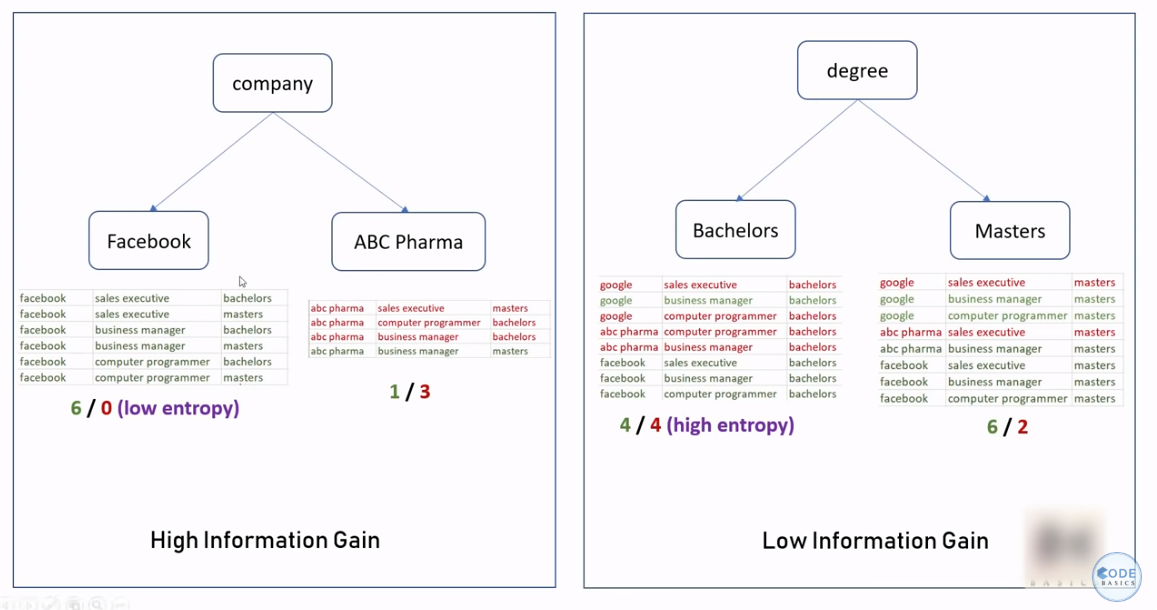

In [16]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [18]:
inp=df.drop('salary_more_then_100k',axis='columns')
inp.head()


,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [19]:
target=df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [25]:
companyy=LabelEncoder()
jobb=LabelEncoder()
degreee=LabelEncoder()



In [28]:
inp['company_label']=companyy.fit_transform(inp['company'])
inp['job_label']=jobb.fit_transform(inp['job'])
inp['degree_label']=degreee.fit_transform(inp['degree'])


inp

,company,job,degree,degree_label,job_label,company_label
0,google,sales executive,bachelors,0,2,2
1,google,sales executive,masters,1,2,2
2,google,business manager,bachelors,0,0,2
3,google,business manager,masters,1,0,2
4,google,computer programmer,bachelors,0,1,2
5,google,computer programmer,masters,1,1,2
6,abc pharma,sales executive,masters,1,2,0
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,1,0,0


In [29]:
inp=inp.drop(['company','job','degree'],axis='columns')
inp

,degree_label,job_label,company_label
0,0,2,2
1,1,2,2
2,0,0,2
3,1,0,2
4,0,1,2
5,1,1,2
6,1,2,0
7,0,1,0
8,0,0,0
9,1,0,0


In [33]:
model = tree.DecisionTreeClassifier()
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [36]:
model.fit(inp.values, target.values)
model.score(inp.values,target.values)

1.0

for a person who has a masters and is working as a business manager in Google

In [38]:
model.predict([[1,0,2]])

array([1])

**Using Decision tree to predict the survival in the Titanic dataset**

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic=df.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis="columns")
titanic

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [42]:
survived=df['Survived']
survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
Pclasss=LabelEncoder()
Sexx=LabelEncoder()
Agee=LabelEncoder()
Faree=LabelEncoder()


titanic['Pclass_label']=Pclasss.fit_transform(titanic['Pclass'])
titanic['Sex_label']=Sexx.fit_transform(titanic['Sex'])
titanic['Age_label']=Agee.fit_transform(titanic['Age'])
titanic['Fare_label']=Faree.fit_transform(titanic['Fare'])
titanic.head(10)



,Pclass,Sex,Age,Fare,Pclass_label,Sex_label,Age_label,Fare_label
0,3,male,22.0,7.2500,2,1,28,18
1,1,female,38.0,71.2833,0,0,51,207
2,3,female,26.0,7.9250,2,0,34,41
3,1,female,35.0,53.1000,0,0,47,189
4,3,male,35.0,8.0500,2,1,47,43
5,3,male,NaN,8.4583,2,1,88,51
6,1,male,54.0,51.8625,0,1,69,186
7,3,male,2.0,21.0750,2,1,6,124
8,3,female,27.0,11.1333,2,0,35,74
9,2,female,14.0,30.0708,1,0,18,154


In [48]:
titanic=titanic.drop(['Pclass','Sex','Age','Fare'],axis="columns")
titanic.head(10)

,Pclass_label,Sex_label,Age_label,Fare_label
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43
5,2,1,88,51
6,0,1,69,186
7,2,1,6,124
8,2,0,35,74
9,1,0,18,154


In [49]:
model=tree.DecisionTreeClassifier()

In [52]:
model.fit(titanic.values, survived.values)

DecisionTreeClassifier()

the model has a score of 0.97/1

In [53]:
model.score(titanic.values, survived.values)

0.9797979797979798